In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv').drop('Id', axis=1)
print(df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [3]:
classes = df['Species'].unique()
train = pd.DataFrame()
test = pd.DataFrame()

for c in classes:
    train = pd.concat([train, df[df['Species'] == c].iloc[:40]],ignore_index=True)
    test = pd.concat([test, df[df['Species'] == c].iloc[40:]],ignore_index=True)

print(train)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
115            7.7           3.0            6.1           2.3  Iris-virginica
116            6.3           3.4            5.6           2.4  Iris-virginica
117            6.4           3.1            5.5           1.8  Iris-virginica
118            6.0           3.0            4.8           1.8  Iris-virginica
119            6.9           3.1            5.4           2.1  Iris-virginica

[120 rows x 5 columns]


In [4]:
print(test)

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
0             5.0           3.5            1.3           0.3      Iris-setosa
1             4.5           2.3            1.3           0.3      Iris-setosa
2             4.4           3.2            1.3           0.2      Iris-setosa
3             5.0           3.5            1.6           0.6      Iris-setosa
4             5.1           3.8            1.9           0.4      Iris-setosa
5             4.8           3.0            1.4           0.3      Iris-setosa
6             5.1           3.8            1.6           0.2      Iris-setosa
7             4.6           3.2            1.4           0.2      Iris-setosa
8             5.3           3.7            1.5           0.2      Iris-setosa
9             5.0           3.3            1.4           0.2      Iris-setosa
10            5.5           2.6            4.4           1.2  Iris-versicolor
11            6.1           3.0            4.6           1.4  Ir

In [8]:
def covariance_matrix(train):
    dim = len(train.columns) - 1
    data = train.iloc[:, :dim]
    mean_vector = np.array(data.mean())
    centered_data = data - mean_vector
    cov_matrix = np.dot(centered_data.T, centered_data) / (len(train) - 1)
    print(cov_matrix)
    return cov_matrix



def fit_Bayes_classifier(train):
    classes = train['Species'].unique()
    dim = len(train.columns) - 1
    mean_vector = {}
    cov_matrix = {}
    inv_cov_matrix = {}
    det_cov_matrix = {}

    for c in classes:
        mean_vector[c] = np.array(train[train['Species'] == c].iloc[:, :dim].mean())
        cov_matrix[c] = np.array(covariance_matrix(train[train['Species'] == c]))
        inv_cov_matrix[c] = np.linalg.inv(cov_matrix[c])
        det_cov_matrix[c] = np.linalg.det(cov_matrix[c])

    return mean_vector, inv_cov_matrix, det_cov_matrix


def Bayes_classifier(train, test_vector, mean_vector, inv_cov_matrix, det_cov_matrix):
    classes = train['Species'].unique()
    dim = len(train.columns) - 1
    bayes_prob = []

    for c in classes:
        apriori = len(train[train['Species'] == c]) / len(train)
        test_vector = np.array(test_vector)
        prob = np.exp(-0.5 * np.dot(np.dot((test_vector - mean_vector[c]).T, inv_cov_matrix[c]), (test_vector - mean_vector[c]))) / (
                    np.power(2 * np.pi, dim / 2) * np.power(det_cov_matrix[c], 0.5))
        bayes_prob.append(prob * apriori)

    return classes[np.argmax(bayes_prob)]        

In [9]:
mean_vector, inv_cov_matrix, det_cov_matrix = fit_Bayes_classifier(train)

[[0.13112179 0.09897436 0.01298077 0.01362179]
 [0.09897436 0.13271795 0.00205128 0.0145641 ]
 [0.01298077 0.00205128 0.02958333 0.00458333]
 [0.01362179 0.0145641  0.00458333 0.00994231]]
[[0.27374359 0.08661538 0.17212821 0.05230769]
 [0.08661538 0.11087179 0.08087179 0.04538462]
 [0.17212821 0.08087179 0.20353205 0.07371795]
 [0.05230769 0.04538462 0.07371795 0.04307692]]
[[0.46794231 0.11041026 0.35777564 0.05125641]
 [0.11041026 0.11323077 0.08107692 0.04625641]
 [0.35777564 0.08107692 0.34532692 0.05930769]
 [0.05125641 0.04625641 0.05930769 0.07425641]]


In [10]:

predictions = []
for i in range(len(test)):
    predictions.append(Bayes_classifier(train, test.iloc[i, :-1], mean_vector, inv_cov_matrix, det_cov_matrix))

compare = pd.DataFrame({'Actual': test['Species'], 'Predicted': predictions})

print(compare)

             Actual        Predicted
0       Iris-setosa      Iris-setosa
1       Iris-setosa      Iris-setosa
2       Iris-setosa      Iris-setosa
3       Iris-setosa      Iris-setosa
4       Iris-setosa      Iris-setosa
5       Iris-setosa      Iris-setosa
6       Iris-setosa      Iris-setosa
7       Iris-setosa      Iris-setosa
8       Iris-setosa      Iris-setosa
9       Iris-setosa      Iris-setosa
10  Iris-versicolor  Iris-versicolor
11  Iris-versicolor  Iris-versicolor
12  Iris-versicolor  Iris-versicolor
13  Iris-versicolor  Iris-versicolor
14  Iris-versicolor  Iris-versicolor
15  Iris-versicolor  Iris-versicolor
16  Iris-versicolor  Iris-versicolor
17  Iris-versicolor  Iris-versicolor
18  Iris-versicolor  Iris-versicolor
19  Iris-versicolor  Iris-versicolor
20   Iris-virginica   Iris-virginica
21   Iris-virginica   Iris-virginica
22   Iris-virginica   Iris-virginica
23   Iris-virginica   Iris-virginica
24   Iris-virginica   Iris-virginica
25   Iris-virginica   Iris-virginica
2

In [11]:
def accuracy(y_pred,y_test):
    return np.sum(y_pred == y_test)/len(y_test)

def accuracy_each_class(compare):
    classes = compare['Actual'].unique()
    accuracy = {}
    for c in classes:
        accuracy[c] = np.sum(compare[compare['Actual'] == c]['Actual'] == compare[compare['Actual'] == c]['Predicted']) / len(compare[compare['Actual'] == c])
    return accuracy

print("Overall Accuracy: ",accuracy(predictions, test['Species']))

print("Accuracy for each class")
acc = accuracy_each_class(compare)
for c in acc:
    print(c,": ",acc[c])


Overall Accuracy:  1.0
Accuracy for each class
Iris-setosa :  1.0
Iris-versicolor :  1.0
Iris-virginica :  1.0


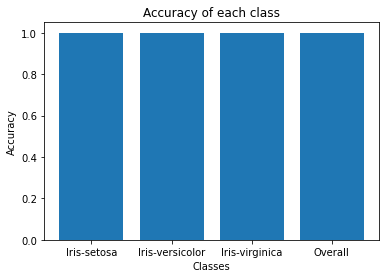

In [12]:
overall_accuracy = accuracy(predictions, test['Species'])

acc['Overall'] = overall_accuracy

plt.bar(acc.keys(), acc.values())
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Accuracy of each class')
plt.show()